A transport company providing bus service to school wants to give incentive and
warning to group of driver to improve the bus service. Create machine learning
model using Kmeans algorithm and help transport company to identify driver
group for incentive and warning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("driver-data.csv")

In [ ]:
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [ ]:
df.describe

<bound method NDFrame.describe of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>

In [ ]:
df.info

<bound method DataFrame.info of               id  mean_dist_day  mean_over_speed_perc
0     3423311935          71.24                    28
1     3423313212          52.53                    25
2     3423313724          64.54                    27
3     3423311373          55.69                    22
4     3423310999          54.58                    25
...          ...            ...                   ...
3995  3423310685         160.04                    10
3996  3423312600         176.17                     5
3997  3423312921         170.91                    12
3998  3423313630         176.14                     5
3999  3423311533         168.03                     9

[4000 rows x 3 columns]>

In [ ]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [ ]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [ ]:
df[df.duplicated]

,id,mean_dist_day,mean_over_speed_perc


In [ ]:
data = df.iloc[:, 1:3].values

In [ ]:
data

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [ ]:
from sklearn.cluster import KMeans
my_cluster_model = KMeans(n_clusters=5)
labels_ = my_cluster_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels_

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

<Axes: ylabel='count'>

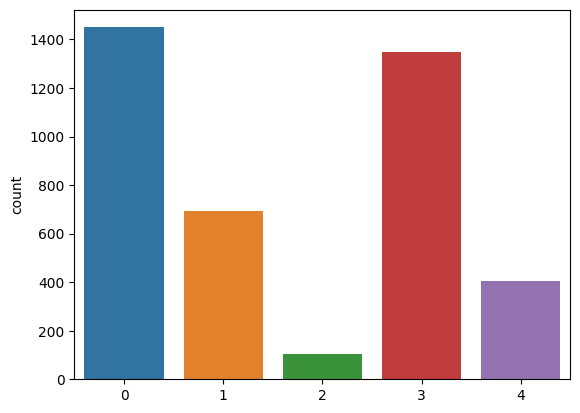

In [ ]:
sns.countplot(x =labels_)

In [ ]:
df['cluster'] = my_cluster_model.labels_
df

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,4
1,3423313212,52.53,25,4
2,3423313724,64.54,27,4
3,3423311373,55.69,22,4
4,3423310999,54.58,25,4
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [ ]:
df.groupby('cluster').count()['id']

cluster
0    1450
1     695
2     104
3    1348
4     403
Name: id, dtype: int64

In [ ]:
my_cluster_model.labels_

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

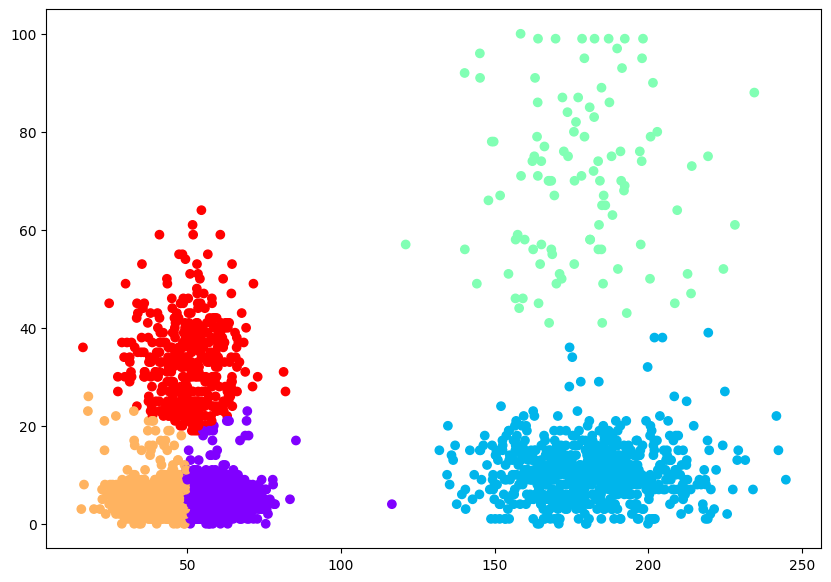

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=my_cluster_model.labels_, cmap='rainbow')

In [ ]:
wcss=[]      #within a cluster sum of square (c-xi)2
for i in range(1,11):
    kmeans=KMeans(init='k-means++',n_clusters=i,random_state=10,n_init='auto') #Start with same random data point as centroid ,random_state=1
    kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)

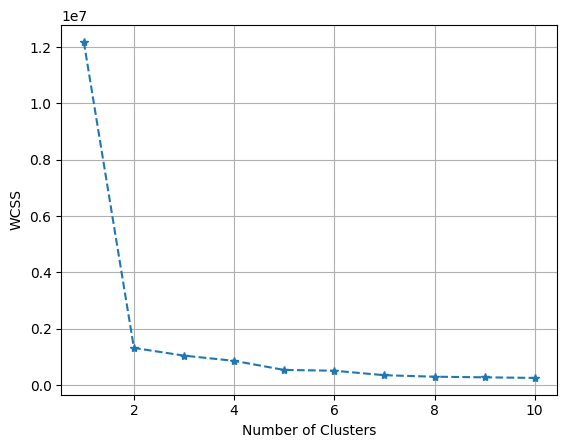

In [ ]:
# Elbow method
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters,n_init='auto')
    m = my_cluster_model.fit_predict(data)
    silhouette_avg = silhouette_score(data, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.8490223286225532
For n_clusters = 3 The average silhouette_score is : 0.7596523406196688
For n_clusters = 4 The average silhouette_score is : 0.5915870234440883
For n_clusters = 5 The average silhouette_score is : 0.5638082715346938
For n_clusters = 6 The average silhouette_score is : 0.5006651239387557


In [ ]:
from sklearn.cluster import KMeans
my_cluster_model = KMeans(n_clusters=3)
labels_ = my_cluster_model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc', 'cluster'], dtype='object')

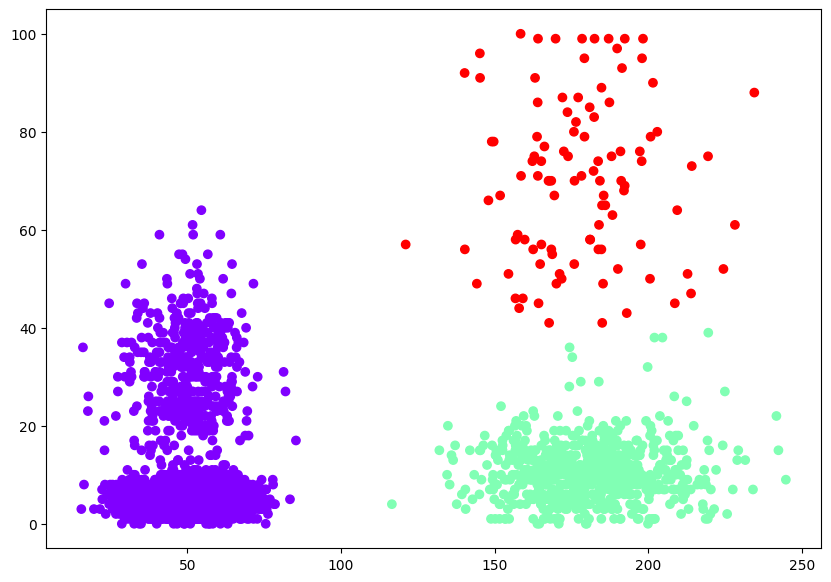

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=my_cluster_model.labels_, cmap='rainbow',)

<Axes: ylabel='count'>

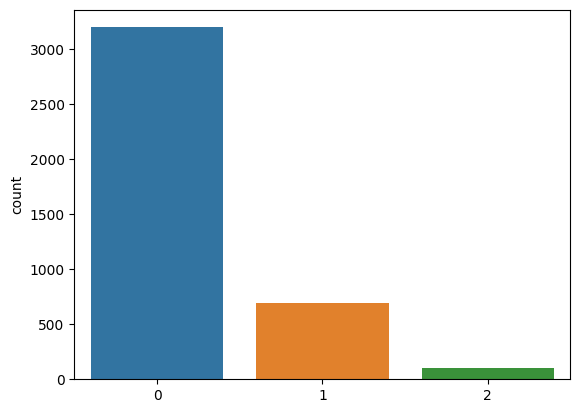

In [ ]:
sns.countplot(x = my_cluster_model.labels_)

**The purple group should receive an incentive,the red group should receive a soft warning, and the green group should receive a strict warning.**